In [9]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Step 1: Connect to SQLite Database
# (Creates a new database file if it doesn't already exist)
conn = sqlite3.connect("LibraryDB-2.sqlite")
cursor = conn.cursor()

In [11]:
# Step 2: Create Tables
cursor.execute("""
CREATE TABLE IF NOT EXISTS Book (
    BookID INTEGER PRIMARY KEY AUTOINCREMENT,
    Title TEXT NOT NULL,
    Author TEXT NOT NULL,
    Genre TEXT NOT NULL,
    YearPublished INTEGER
);
""")

cursor.execute("""
CREATE TABLE IF NOT EXISTS Member (
    MemberID INTEGER PRIMARY KEY AUTOINCREMENT,
    Name TEXT NOT NULL,
    Email TEXT NOT NULL,
    Phone TEXT
);
""")

cursor.execute("""
CREATE TABLE IF NOT EXISTS Borrowing (
    BorrowingID INTEGER PRIMARY KEY AUTOINCREMENT,
    BookID INTEGER,
    MemberID INTEGER,
    IssueDate DATE,
    ReturnDate DATE,
    FOREIGN KEY (BookID) REFERENCES Book(BookID),
    FOREIGN KEY (MemberID) REFERENCES Member(MemberID)
);
""")
print("Tables created successfully!")

Tables created successfully!


In [12]:
# Step 3: Insert Sample Data
# Books
cursor.executemany("""
INSERT INTO Book (Title, Author, Genre, YearPublished)
VALUES (?, ?, ?, ?)
""", [
    ("1984", "George Orwell", "Dystopian", 1949),
    ("Brave New World", "Aldous Huxley", "Sci-Fi", 1932),
    ("To Kill a Mockingbird", "Harper Lee", "Fiction", 1960),
    ("The Great Gatsby", "F. Scott Fitzgerald", "Classic", 1925),
    ("Moby Dick", "Herman Melville", "Adventure", 1851)
])

# Members
cursor.executemany("""
INSERT INTO Member (Name, Email, Phone)
VALUES (?, ?, ?)
""", [
    ("Alice Smith", "alice@example.com", "123-456-7890"),
    ("Bob Johnson", "bob@example.com", "234-567-8901"),
    ("Charlie Brown", "charlie@example.com", "345-678-9012")
])

# Borrowing Records
cursor.executemany("""
INSERT INTO Borrowing (BookID, MemberID, IssueDate, ReturnDate)
VALUES (?, ?, ?, ?)
""", [
    (1, 1, "2024-11-01", None),
    (2, 2, "2024-10-15", "2024-10-25"),
    (3, 1, "2024-09-20", None),
    (4, 3, "2024-09-10", "2024-09-20"),
    (5, 2, "2024-08-01", "2024-08-15")
])

conn.commit()
print("Sample data inserted successfully!")

Sample data inserted successfully!


In [13]:
# Step 4: Query Data
# Example: Books currently borrowed
query = """
SELECT Book.Title, Member.Name, Borrowing.IssueDate
FROM Borrowing
JOIN Book ON Borrowing.BookID = Book.BookID
JOIN Member ON Borrowing.MemberID = Member.MemberID
WHERE Borrowing.ReturnDate IS NULL;
"""
df = pd.read_sql_query(query, conn)
print("\nBooks currently borrowed:")
print(df)


Books currently borrowed:
                   Title         Name   IssueDate
0                   1984  Alice Smith  2024-11-01
1  To Kill a Mockingbird  Alice Smith  2024-09-20
2                   1984  Alice Smith  2024-11-01
3  To Kill a Mockingbird  Alice Smith  2024-09-20


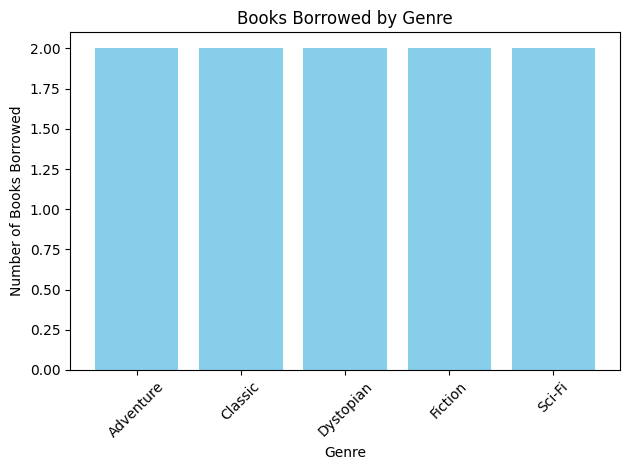

In [14]:
# Step 5: Visualization
# Number of books borrowed by genre
genre_query = """
SELECT Genre, COUNT(*) AS BorrowCount
FROM Book B
JOIN Borrowing BR ON B.BookID = BR.BookID
GROUP BY Genre;
"""
genre_df = pd.read_sql_query(genre_query, conn)

# Plot the results
plt.bar(genre_df['Genre'], genre_df['BorrowCount'], color='skyblue')
plt.title("Books Borrowed by Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Books Borrowed")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
# Step 6: Cleanup
conn.close()
print("Database connection closed.")

Database connection closed.
